# Task 1. Reading the dataset, remove duplicates and print sample data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

# Read csv file
CarData = pd.read_csv('/content/car_price_prediction.csv', na_values="-")

# Shape before deleting duplicates
print('Number of Cars and Attributes: ' +str(CarData.shape))

# Delete duplicate entries from dataset
CarData = CarData.drop_duplicates()

# Shape after deleting duplicates
print('Number of Cars and Attributes (without duplicates): ' +str(CarData.shape))

# Display first 10 cars in dataset
CarData.head(10)

Number of Cars and Attributes: (19237, 18)
Number of Cars and Attributes (without duplicates): (18924, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394.0,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


Observations from task 1:

There were 313 duplicates in the original dataset. (19237-18924=313)

After removing the duplicates, there are 18,924 cars and 18 attributes as follows:



*   ID
*   Price (Target, USD)
*   Levy
*   Manufacturer
*   Model
*   Prod. year
*   Category (Sedan, Hatchback etc)
*   Leather interior (yes/no)
*   Fuel type
*   Engine volume
*   Mileage (Kilometres driven)
*   Cylinders
*   Gear box type
*   Drive wheels
*   Doors (Number of doors)
*   Wheel (Side of steering wheel)
*   Color
*   Airbags (Number of airbags)

It is also clear that many columns will need to be cleaned, for example the number of doors, as it is currently stored in date format.







Initial Data Cleaning.

In [8]:
# Getting rid of 0, -Mar and -May
CarData["Doors"] = CarData["Doors"].str.strip("-MayMar0")

# Rmoving "km" from data points
CarData["Mileage"] = CarData["Mileage"].str.strip("km")

# Changing "left wheel" to "Left-hand drive" to match other data
CarData["Wheel"]=CarData["Wheel"].str.replace("Left wheel", "Left-hand drive")

# Replacing data named Jeep" with correct category "SUV"
CarData["Category"]=CarData["Category"].str.replace("Jeep", "SUV")

# Filter out turbocharged cars and create a new column "Aspiration",
# Allowing for differentiation between Turbocharged cars (Turbo), and Naturally Aspirated (NA)
CarData["Aspiration"] = CarData["Engine volume"].str.extract("(Turbo)", expand=False).fillna("NA")
CarData.loc[CarData["Aspiration"] != "NA", "Engine volume"] = CarData.loc[CarData["Aspiration"] != "NA", "Engine volume"].str.replace(" Turbo", "")

# Convert Engine Volume to float
CarData['Engine volume'] = CarData['Engine volume'].astype(float)

# Convert Cylinders to integer
CarData['Cylinders'] = CarData['Engine volume'].astype(int)

# Convert Mileage to int
CarData['Mileage'] = CarData['Mileage'].astype(int)

CarData.head(10)



,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Aspiration
0,45654403,13328,1399.0,LEXUS,RX 450,2010,SUV,Yes,Hybrid,3.5,186005,3,Automatic,4x4,4,Left-hand drive,Silver,12,NA
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,SUV,No,Petrol,3.0,192000,3,Tiptronic,4x4,4,Left-hand drive,Black,8,NA
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,1,Variator,Front,4,Right-hand drive,Black,2,NA
3,45769185,3607,862.0,FORD,Escape,2011,SUV,Yes,Hybrid,2.5,168966,2,Automatic,4x4,4,Left-hand drive,White,0,NA
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,1,Automatic,Front,4,Left-hand drive,Silver,4,NA
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,SUV,Yes,Diesel,2.0,160931,2,Automatic,Front,4,Left-hand drive,White,4,NA
6,45656768,1803,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,1,Automatic,Front,4,Left-hand drive,White,12,NA
7,45816158,549,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,2,Automatic,Front,4,Left-hand drive,Grey,12,NA
8,45641395,1098,394.0,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,2,Automatic,Front,4,Left-hand drive,Black,12,NA
9,45756839,26657,NaN,LEXUS,RX 350,2007,SUV,Yes,Petrol,3.5,128500,3,Automatic,4x4,4,Left-hand drive,Silver,12,NA


Observations from initial cleaning:
Sample data is more easily interpreted, and data is more suitable for further analysis.

* ‘Doors’ column no longer stored in date format
* ‘Mileage’ no longer contains ‘km’ suffix and is purely numerical, enabling it to be cast to int type
* ‘left wheel’ value in ‘Wheel’ column replaced by ‘Left-hand drive’ in order to match format convention for other data in column
* ‘Jeep’ value corrected to ‘SUV’ in ‘Category’ column
* New column ‘Aspiration’ created to differentiate between naturally aspirated and turbo charged engines,‘Engine volume’ column stripped of ‘turbo’ suffix to allow for purely numerical value and cast to float type

* ‘Cylinders’ cast to float


# Task 2. Problem statement definition.


*   Prediction model to determine the price of a car based on it's attributes.
*   Dependent/target variable is the price, independent variables are the relevant attributes from the list of 18 attributes.
* As the target variable is continuous, a supervised ML Regression model will be suitable for the problem statement


# Task 3. Visualise distribution of Target variable

As the target variable 'Price' is continuous, we can view its distribution with a histogram.

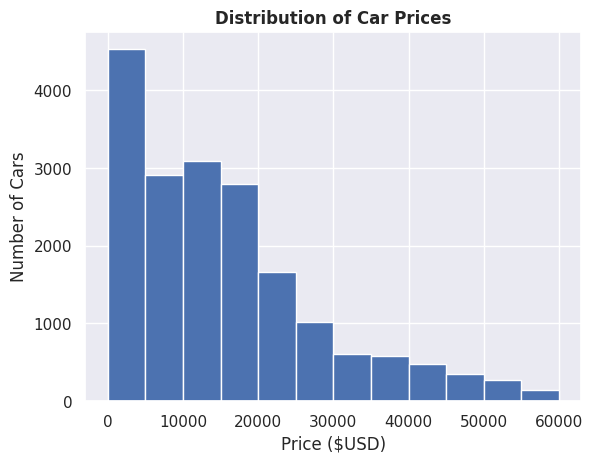

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.hist(CarData['Price'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000])
plt.title("Distribution of Car Prices", weight = "bold")
plt.xlabel("Price ($USD)")
plt.ylabel("Number of Cars")
plt.show()


For the distribuition of car prices, the data is imbalanced with a vast bias towards the lower priced cars. (Positive skew)

This skew will affect the efficacy of a prediction model, and so must be transformed to be more suitable for our purposes.

There were also extreme outliers (26 million max) and so the distribution had to be confined to 60k to meaningfully plot.

We will remove the outliers before transformation to completely clean the target variable for later steps.

In [10]:
upper_limit = CarData['Price'].mean() + 3 * CarData['Price'].std()
lower_limit = CarData['Price'].mean() - 3 * CarData['Price'].std()
print('upper_limit:', round(upper_limit, 2))
print('upper_limit:', round(lower_limit,2))

CarData.loc[(CarData['Price'] > upper_limit) | (CarData['Price'] < lower_limit)]

upper_limit: 594994.33
upper_limit: -557819.46


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Aspiration
1225,45795524,627220,NaN,MERCEDES-BENZ,G 65 AMG 63AMG,2020,SUV,Yes,Petrol,6.3,0,6,Tiptronic,4x4,4,Left-hand drive,Black,12,Turbo
8541,45761204,872946,2067.0,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4.0,2531,4,Tiptronic,4x4,4,Left-hand drive,Black,0,NA
16983,45812886,26307500,NaN,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,1,Manual,Front,2,Left-hand drive,Blue,0,NA


In [11]:
CarData['Price'][CarData['Price'] > 65000].sort_values(ascending=False)

,Price
16983,26307500
8541,872946
1225,627220
5008,308906
9367,297930
...,...
10934,65545
6379,65052
5625,65040
15976,65024


array([[<Axes: title={'center': 'Price'}>]], dtype=object)

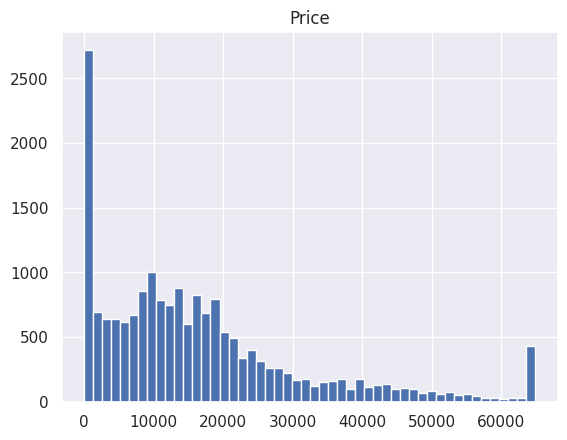

In [12]:
CarData['Price'][CarData['Price'] > 65000] =64823
CarData.hist(['Price'], bins=50)

##Log Transformation

Utilising the Log transformation method, we can normalise the data to bring the mean and median of Price closer together.

Mean of Price before transformation: 16503
Median of Price before transformation: 13172
Mean of Price after transformation: 9
Median of Price after transformation: 9


<Axes: >

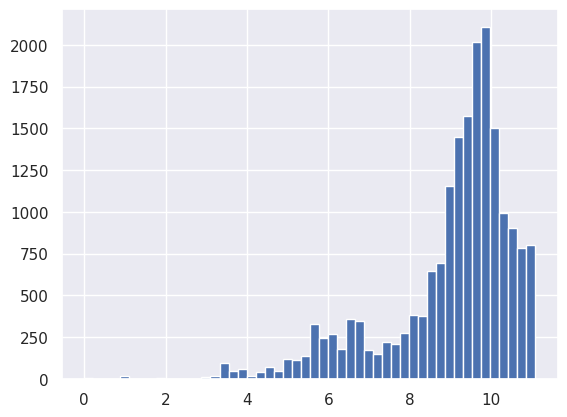

In [13]:
import numpy as np

print('Mean of Price before transformation: '+ str(round(CarData['Price'].mean())))
print('Median of Price before transformation: '+ str(round(CarData['Price'].median())))

CarData['normPrice'] = np.log(CarData['Price'])

print('Mean of Price after transformation: '+ str(round(CarData['normPrice'].mean())))
print('Median of Price after transformation: '+ str(round(CarData['normPrice'].median())))

CarData['normPrice'].hist(bins = 50)

Observations.

Transformation effectively normalised the price column distribution, mean and median for normPrice is the same (9)

Distribution is now satisfactory to proceed.


# Task 4. Data exploration at basic level
We can now use various pandas methods to gain insight into the dataset overall

In [14]:
CarData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  int64  
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [15]:
# Looking at the descriptive statistics of the data
CarData.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Aspiration,normPrice
count,1.892400e+04,18924.000000,13215.000000,18924,18924,18924.000000,18924,18924,18924,18924.000000,1.892400e+04,18924.000000,18924,18924,18924,18924,18924,18924.000000,18924,18924.000000
unique,NaN,NaN,NaN,65,1590,NaN,11,2,7,NaN,NaN,NaN,4,3,3,2,16,NaN,2,NaN
top,NaN,NaN,NaN,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,NaN,NaN,NaN,Automatic,Front,4,Left-hand drive,Black,NaN,NA,NaN
freq,NaN,NaN,NaN,3729,1069,NaN,8600,13731,9944,NaN,NaN,NaN,13282,12695,18032,17471,4944,NaN,17032,NaN
mean,4.557538e+07,16503.350137,906.299205,NaN,NaN,2010.914236,NaN,NaN,NaN,2.306251,1.555373e+06,1.934316,NaN,NaN,NaN,NaN,NaN,6.568379,NaN,9.020343
std,9.375468e+05,15079.917311,463.296871,NaN,NaN,5.665749,NaN,NaN,NaN,0.877591,4.880221e+07,0.918359,NaN,NaN,NaN,NaN,NaN,4.322323,NaN,1.577242
min,2.074688e+07,1.000000,87.000000,NaN,NaN,1939.000000,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,4.569501e+07,5331.000000,640.000000,NaN,NaN,2009.000000,NaN,NaN,NaN,1.800000,7.019575e+04,1.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,8.581294
50%,4.577191e+07,13172.000000,781.000000,NaN,NaN,2012.000000,NaN,NaN,NaN,2.000000,1.264000e+05,2.000000,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,9.485849
75%,4.580174e+07,22063.000000,1058.000000,NaN,NaN,2015.000000,NaN,NaN,NaN,2.500000,1.891198e+05,2.000000,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,10.001657


In [16]:
# Finding unique values for each column
# To understand which column is categorical and which one is Continuous

CarData.nunique()

,0
ID,18924
Price,2112
Levy,558
Manufacturer,65
Model,1590
Prod. year,54
Category,11
Leather interior,2
Fuel type,7
Engine volume,65


**Observations from basic EDA.**

Volume: 18,924 cars. 19 attributes

**Types of columns**

Quantitative:
* Price - Target (int64)
* Prod. year - Selected (int64)
* Cylinders - Selected (float64)
* Airbags - Selected (int64)
* Mileage - Selected (int64)
* Engine volume - Selected (int64)
* Levy - selected (float64)

Qualitative:

* ID - Removed (ID number is arbitrary, irrelevant for price prediction)
* Wheel - Removed (Side of driving wheel not relevant for price prediction)
* Color - Removed (As particular paint job is not specified, does not affect price)

Categorical:

* Manufacturer - Selected
* Model - Selected
* Category - Selected
* Leather interior - Selected
* Fuel type - Selected
* Gear box type - Selected
* Drive wheels - Selected
* Doors - Selected
* Aspiration - Selected

Removals include:
* ID
* Wheel
* Colour


In [17]:
CarData = CarData.drop(columns = 'Wheel')
CarData = CarData.drop(columns = 'Color')
CarData = CarData.drop(columns = 'ID')

Qualitative data removed, can now proceed with EDA.

# Task 5: Visual Exploratory Data Analysis (EDA) of data (with histogram and barcharts)

Before plotting the categorical data with bar charts, there are some columns with potential to have too many unique values to clearly display.

In [18]:
# Determine which categorical columns have too many unique values for meaningful bar plot

print('Manufacturer: '+str(CarData['Manufacturer'].nunique()))
print('Model: '+str(CarData['Model'].nunique()))
print('Category: '+str(CarData['Category'].nunique()))
print('Leather interior: '+str(CarData['Leather interior'].nunique()))
print('Fuel type: '+str(CarData['Fuel type'].nunique()))
print('Gear box type: '+str(CarData['Gear box type'].nunique()))
print('Drive wheels: '+str(CarData['Drive wheels'].nunique()))
print('Doors: '+str(CarData['Doors'].nunique()))
print('Aspiration: '+str(CarData['Aspiration'].nunique()))

Manufacturer: 65
Model: 1590
Category: 11
Leather interior: 2
Fuel type: 7
Gear box type: 4
Drive wheels: 3
Doors: 3
Aspiration: 2


**Observations**

Manufacturer and Model have too many unique values to plot clearly on a bar chart.

Due to this we will take the most occurring values of 'Manufacturer' and group the remaining in an 'other' column.

For 'Model' there are significantly more unique values, because of this we will take the 10 most occurring and drop the remaining to clearly display a snapshot of the distribution.


In [19]:
print(CarData['Manufacturer'].value_counts().head(10))
print('-----------------')
print(CarData['Model'].value_counts().head(10))

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64
-----------------
Model
Prius       1069
Sonata      1067
Camry        929
Elantra      910
E 350        534
Santa FE     527
FIT          444
H1           435
Tucson       426
X5           351
Name: count, dtype: int64


We can see the occurance of values significantly drops off for each column.

We can now plot the categorical data clearly by grouping the less occuring values together.

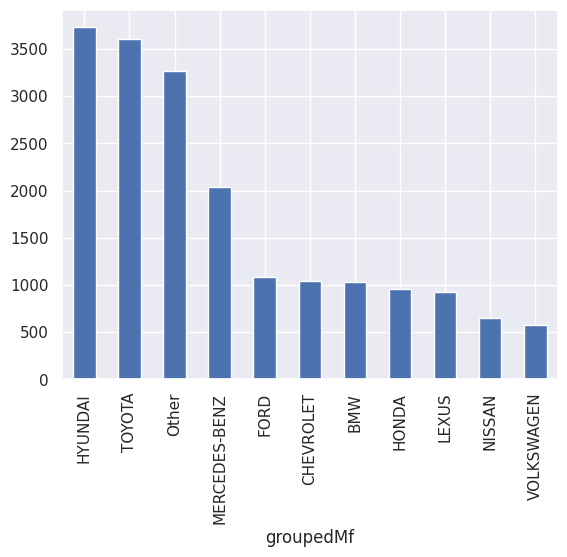

In [20]:
mfThreshold = 570
mdlThreshold = 350

mfFrequency = CarData['Manufacturer'].value_counts()
mdlFrequency = CarData['Model'].value_counts()

# Use frequency.get(x, 0) to get the frequency of the current manufacturer 'x'
# If the manufacturer is not in the frequency Series, it will return 0,
# ensuring all manufacturers are considered.

# Plot 10 most occurring car manufacturers and group lesser
CarData['groupedMf'] = CarData['Manufacturer'].apply(lambda x: x if mfFrequency.get(x, 0) >= mfThreshold else 'Other')
CarData['groupedMf'].value_counts().plot(kind='bar')


CarData['groupedMdl'] = CarData['Model'].apply(lambda x: x if mdlFrequency.get(x, 0) >= mdlThreshold else 'Other')
CarData = CarData[CarData['groupedMdl'] != 'Other']

Ten most frequent manufacturers, less frequent grouped in 'other'

<Axes: xlabel='groupedMdl'>

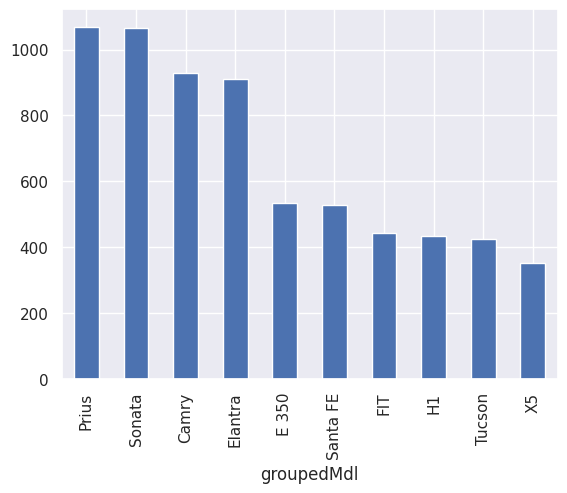

In [21]:
CarData['groupedMdl'].value_counts().plot(kind='bar')

Distribution of the 10 most frequently occurring car Models.

We can now plot the distributions of the remaining categorical data columns.

In [22]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(15,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

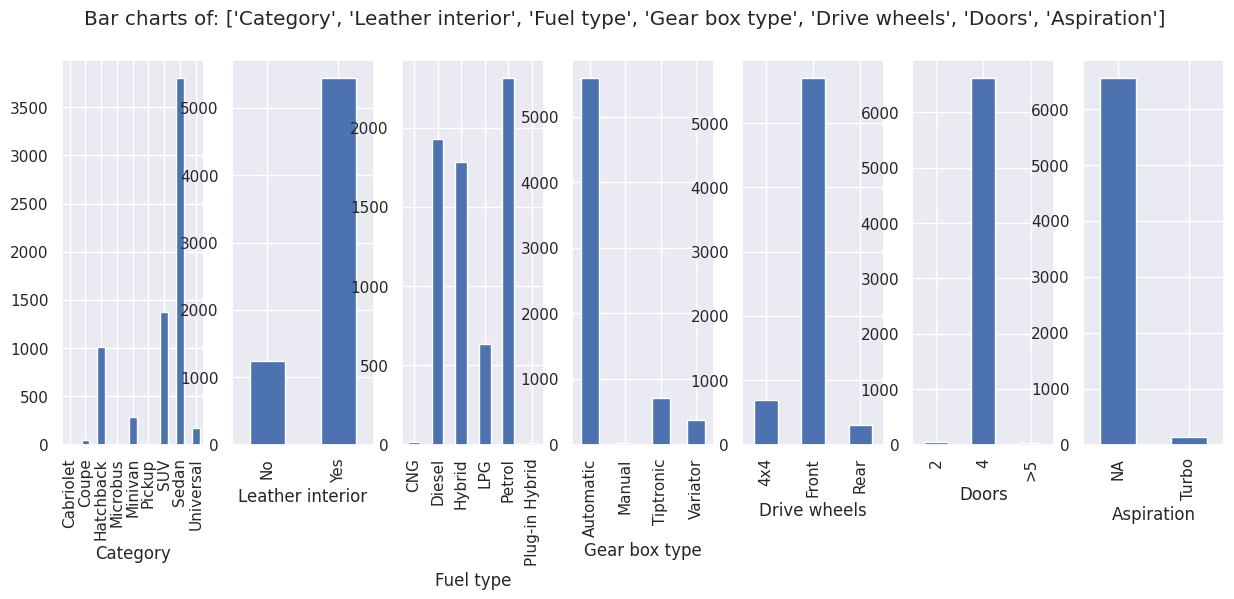

In [23]:
PlotBarCharts(inpData=CarData, colsToPlot=[ 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Aspiration'])

**Categorical Data Distribution**

Bar charts represent frequencies of each category (Y-axis) vs the category name (X-axis)

Columns such as Category, Leather interior, Gear box type, Drive wheels, Doors and Aspiration all display skewed distribution with one overly dominant bar. Such columns will likely not be selected due to there being no information to learn for the ML model.

We can now plot the distribution of the continuous data using histograms.

array([[<Axes: title={'center': 'Prod. year'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Airbags'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Engine volume'}>,
        <Axes: title={'center': 'Levy'}>]], dtype=object)

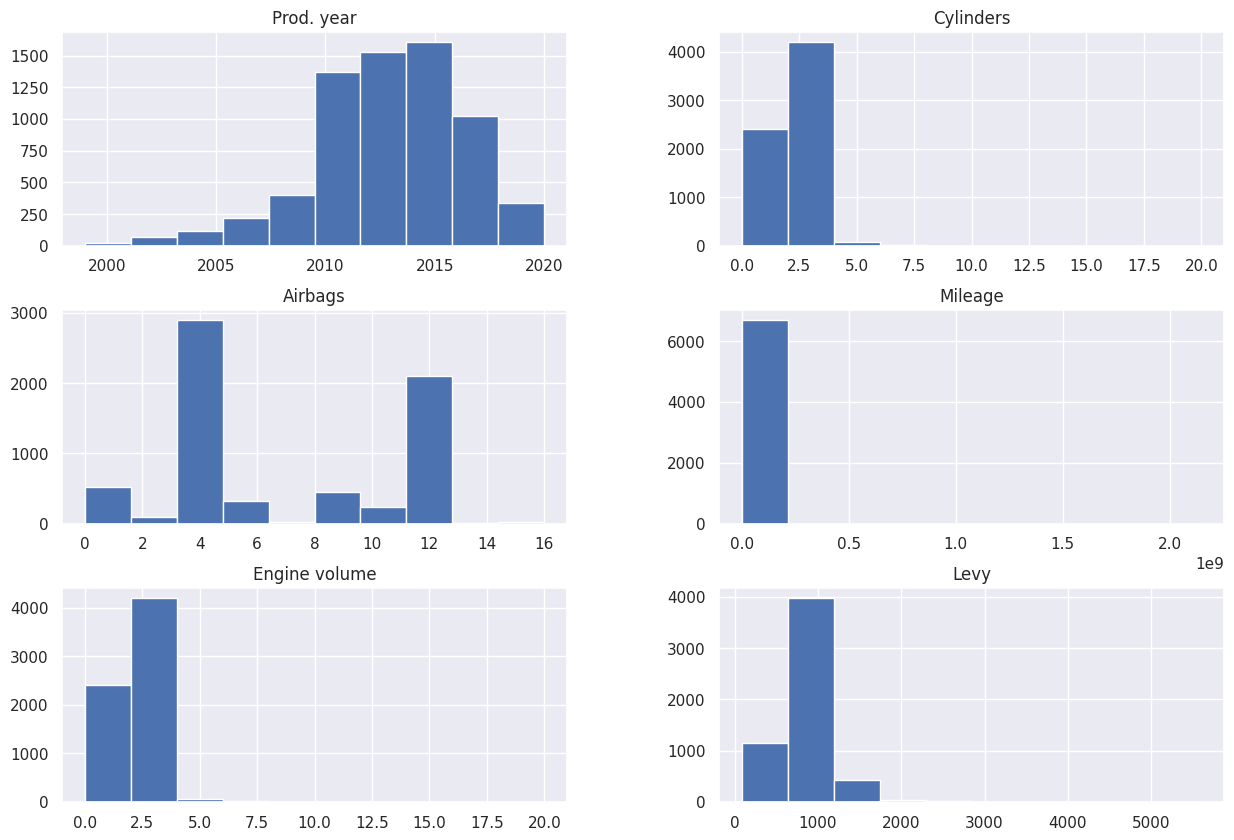

In [24]:
CarData.hist(['Prod. year', 'Cylinders', 'Airbags', 'Mileage', 'Engine volume', 'Levy'], figsize=(15,10))

**Continuous data distribution**

Histograms show data distrabution for each continuous variable, Range of values (X-axis) vs Numbers of values in said Range (Y-axis)

* Production year: Selected, distribution is good
* Airbags: Selected, distribution is good
* Engine volume: Selected, but outliers above 5.0, must be treated
* Mileage: Selected, but too many outliers to visualise here, must be treated
* Cylinders: Selected, outliers above 5.0 must be treated
* Levy: Selected, outliers above 2000 must be treated


# Task 6: Outlier analysis

As identified in the EDA process, 'Engine volume', 'Mileage', 'Cylinders' and 'Levy' must be treated for outliers

**Engine Volume**

Finding nearest values to 5.0 mark

In [25]:
CarData['Engine volume'][CarData['Engine volume'] < 5.0].sort_values(ascending=False)

,Engine volume
5867,4.8
3921,4.8
569,4.8
10393,4.8
11103,4.8
...,...
12699,1.3
8163,1.1
12917,0.0
3516,0.0


Nearest value = 4.8, thus replace any value above 5.0 with it

In [26]:
CarData['Engine volume'][CarData['Engine volume'] > 5.0] =4.8

Visualising distribution after outlier treatment:

array([[<Axes: title={'center': 'Engine volume'}>]], dtype=object)

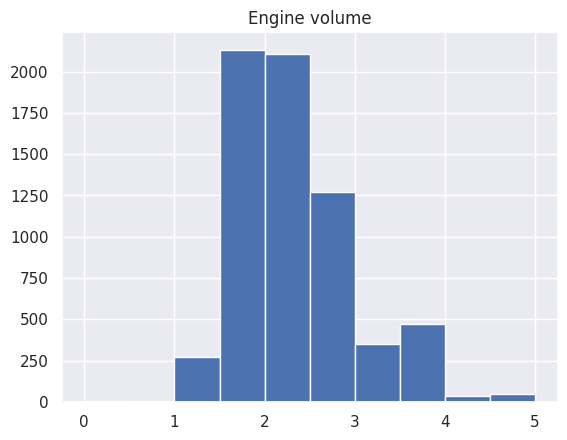

In [27]:
CarData.hist(['Engine volume'])

Distribution improved after outlier treatment, is acceptable.

**Mileage**

Data for mileage is incredibly skewed, we must use the Z-score method to first find the outliers

In [28]:
upper_limit = CarData['Mileage'].mean() + 0.06 * CarData['Mileage'].std()
lower_limit = CarData['Mileage'].mean() - 3 * CarData['Mileage'].std()
print('upper_limit:', round(upper_limit, 2))
print('upper_limit:', round(lower_limit,2))

CarData.loc[(CarData['Mileage'] > upper_limit) | (CarData['Mileage'] < lower_limit)]

upper_limit: 2421187.92
upper_limit: -88013666.41


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Airbags,Aspiration,normPrice,groupedMf,groupedMdl
2512,15681,NaN,BMW,X5,2005,SUV,Yes,Petrol,4.4,7789999,4,Automatic,Rear,4,0,NA,9.660205,BMW,X5
8486,40,NaN,HONDA,FIT,2006,Hatchback,Yes,Petrol,1.3,11111111,1,Variator,Front,4,4,NA,3.688879,HONDA,FIT
9524,50,NaN,TOYOTA,Prius,2011,Hatchback,No,Hybrid,1.8,1111111111,1,Automatic,Front,4,6,NA,3.912023,TOYOTA,Prius
15393,15681,NaN,TOYOTA,Prius,2008,Sedan,No,Petrol,2.0,2147483647,2,Automatic,Front,4,0,NA,9.660205,TOYOTA,Prius
18673,40,NaN,HONDA,FIT,2007,Hatchback,Yes,Petrol,1.6,15000000,1,Automatic,Front,4,9,NA,3.688879,HONDA,FIT
18846,14113,NaN,TOYOTA,Prius,2005,Hatchback,Yes,Hybrid,1.5,2696320,1,Automatic,Front,4,6,NA,9.554852,TOYOTA,Prius


In [29]:
CarData['Mileage'][CarData['Mileage'] < 800000].sort_values(ascending=False)

,Mileage
1053,793967
18772,789888
18171,746740
2274,746740
10222,742997
...,...
1113,0
4843,0
8249,0
16306,0


Nearest value is 789888, can now replace values over 800000 with it and display the new distribution.

array([[<Axes: title={'center': 'Mileage'}>]], dtype=object)

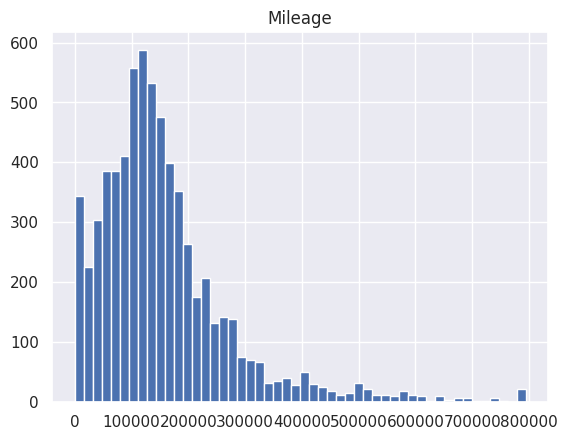

In [30]:
CarData['Mileage'][CarData['Mileage'] > 800000] =789888
CarData.hist(['Mileage'], bins=50)

Results:
Distribution has improved significantly, it is now acceptable

**Cylinders**

In [31]:
CarData['Cylinders'][CarData['Cylinders'] < 5].sort_values(ascending=False)

,Cylinders
10319,4
17090,4
11799,4
8783,4
18711,4
...,...
4622,1
12598,1
3516,0
12917,0


(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.404e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.376e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.230e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        6.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.800e+01]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
        1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
        2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
        3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ,
        4.16666667, 4.33333333, 4.5       , 4.66666667, 4.83333333,
        5.        ]),
 <BarContainer object of 30 artists>)

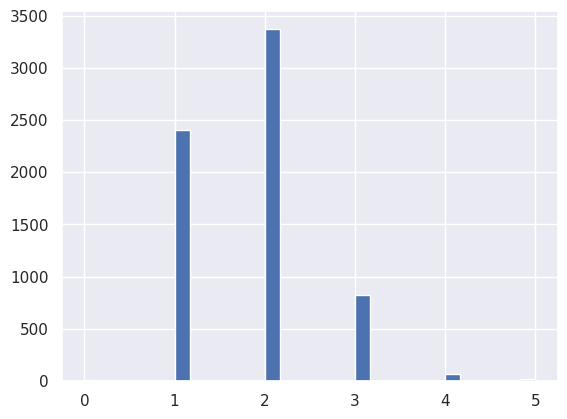

In [32]:
CarData['Cylinders'][CarData['Cylinders'] > 5]= 4
plt.hist(CarData['Cylinders'], bins=30)

Distribution has significantly improved, it is now acceptable.

**Levy**

In [33]:
CarData['Levy'][CarData['Levy'] < 2000].sort_values(ascending=False)

,Levy
4344,1974.0
4180,1974.0
1401,1968.0
16841,1968.0
16577,1888.0
...,...
16622,247.0
13238,247.0
10603,87.0
3516,87.0


Nearest value is 1974, it can now replace values above 2000.

(array([  3.,   0.,  13.,  68., 204.,  86.,  65., 568., 640., 258., 922.,
        633., 570., 194., 289., 428.,  51., 161., 119.,  62.,  99.,   8.,
         27.,   2.,  71.,   0.,   2.,   3.,  27.,  32.]),
 array([  87. ,  149.9,  212.8,  275.7,  338.6,  401.5,  464.4,  527.3,
         590.2,  653.1,  716. ,  778.9,  841.8,  904.7,  967.6, 1030.5,
        1093.4, 1156.3, 1219.2, 1282.1, 1345. , 1407.9, 1470.8, 1533.7,
        1596.6, 1659.5, 1722.4, 1785.3, 1848.2, 1911.1, 1974. ]),
 <BarContainer object of 30 artists>)

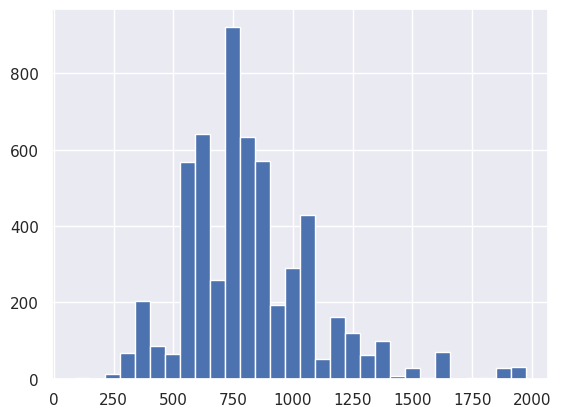

In [34]:
CarData['Levy'][CarData['Levy'] > 2000] =1974
plt.hist(CarData['Levy'], bins=30)

Distribution has significantly improved, it is now acceptable.

# Task 7: Missing values analysis

**Using a heatmap to check for and visualise missing values in dataset**

,0
Price,0
Levy,1087
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0
Mileage,0


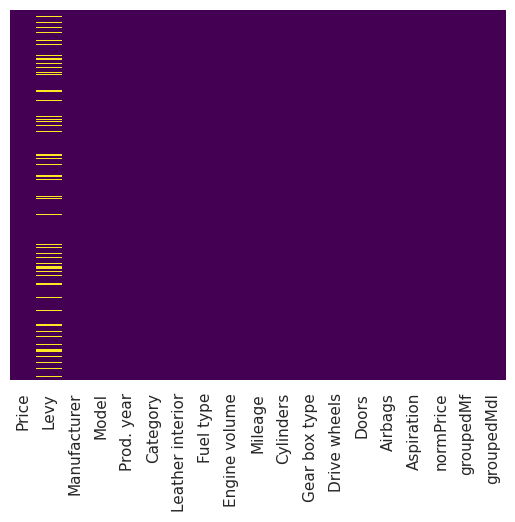

In [35]:
sns.heatmap(CarData.isnull(), yticklabels=False, cbar=False, cmap='viridis')
CarData.isnull().sum()

Observations:
There are 1087 missing values in the 'Levy' column, less than 30% of the column and thus can be imputed with median values. This is the only column that contains missing values and so no other columns need to be treated.

In [36]:
CarData['Levy'].fillna(CarData['Levy'].median(), inplace=True)

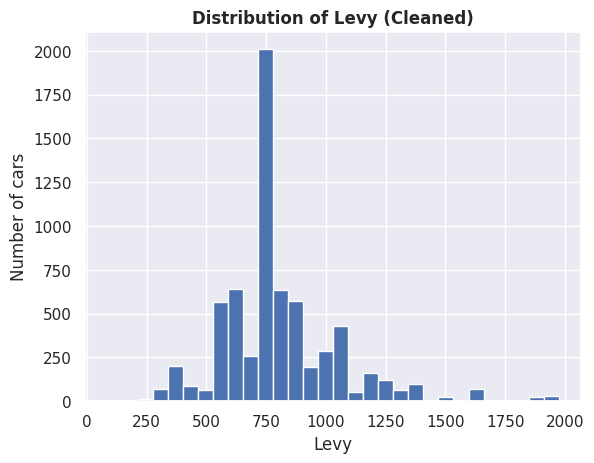

In [37]:
# Histogram after cleaning
plt.hist(CarData['Levy'], bins=30)
plt.title("Distribution of Levy (Cleaned)", weight = "bold")
plt.xlabel("Levy")
plt.ylabel("Number of cars")
plt.show()

Results:
Frequency of values at the median has significantly increased due to the number of missing values, however distribution is still acceptable.


# Task 8: Feature Selection

First we will analyse the relationship between the continuous data and the target variable normPrice, using scatterplots

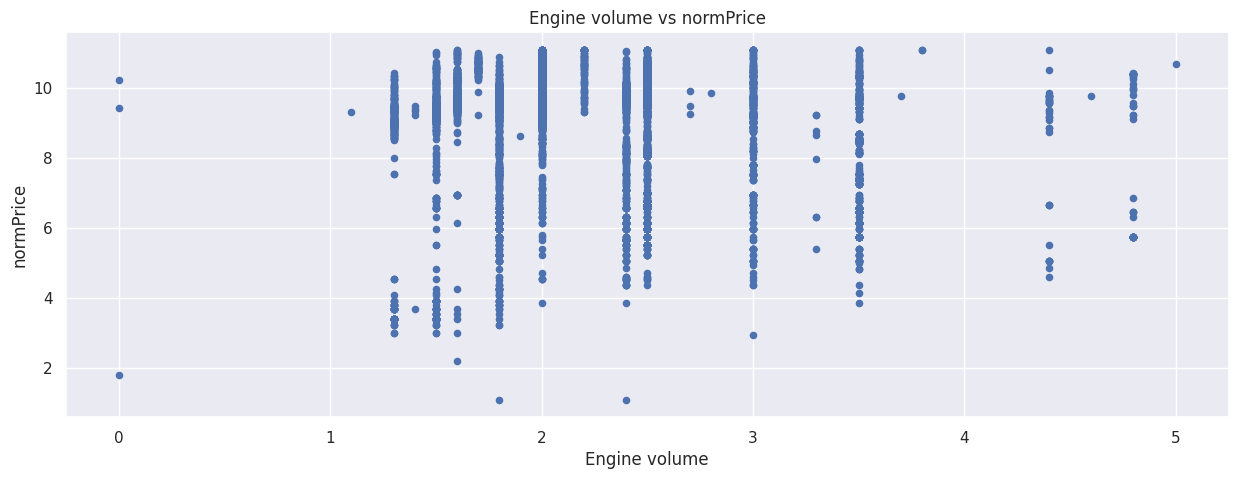

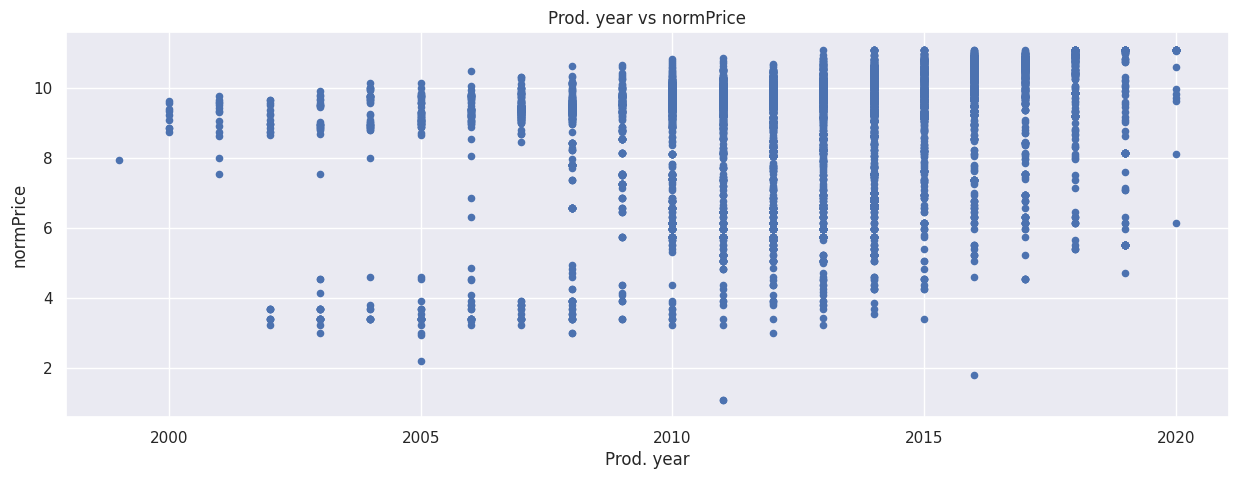

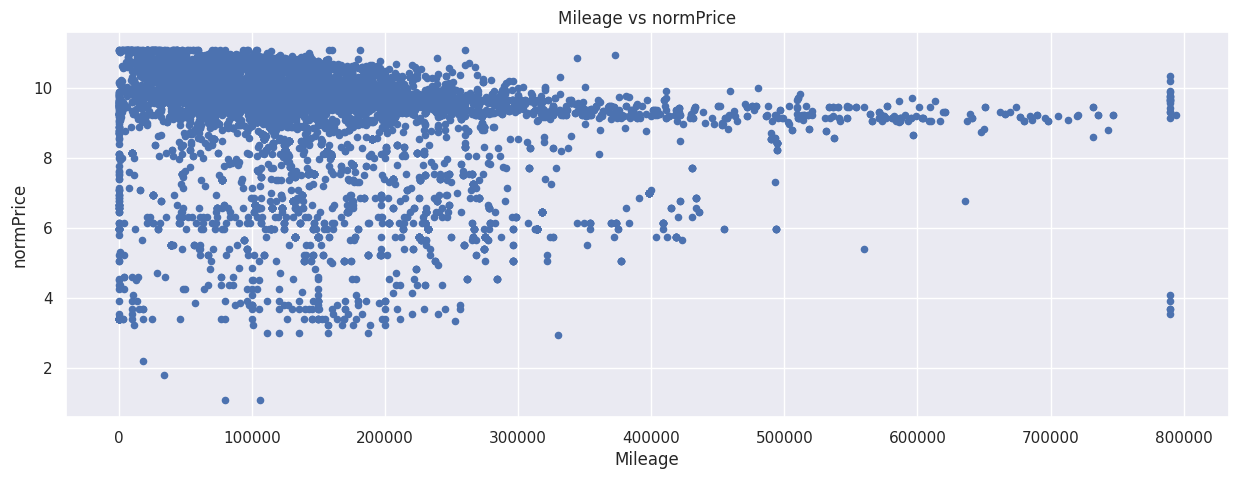

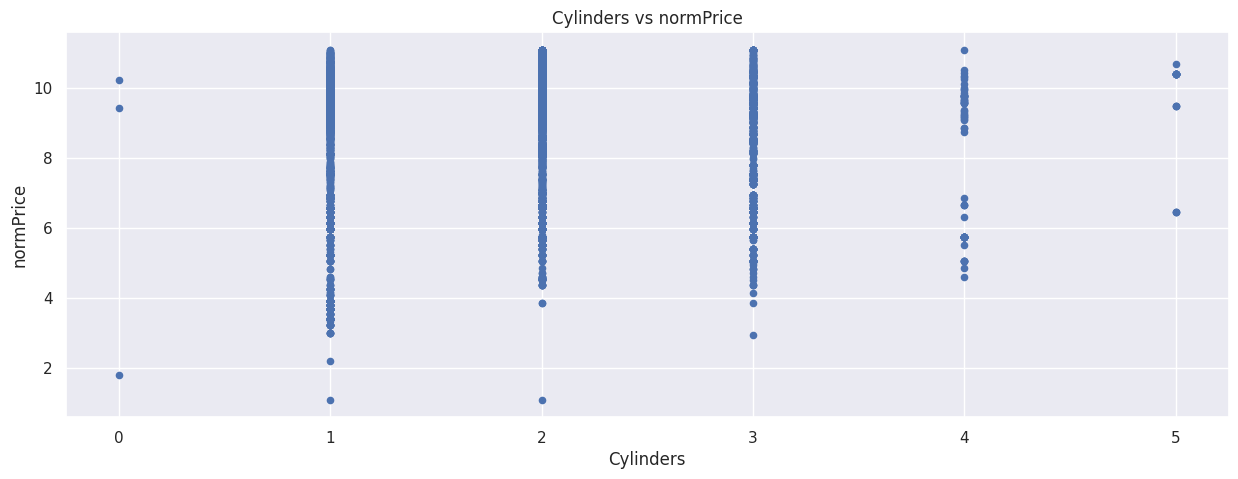

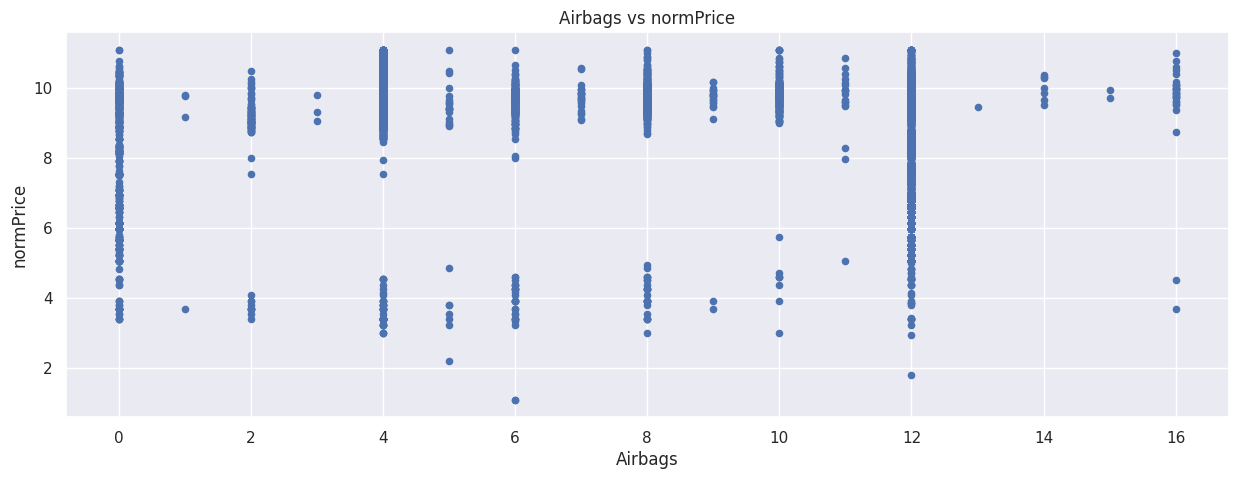

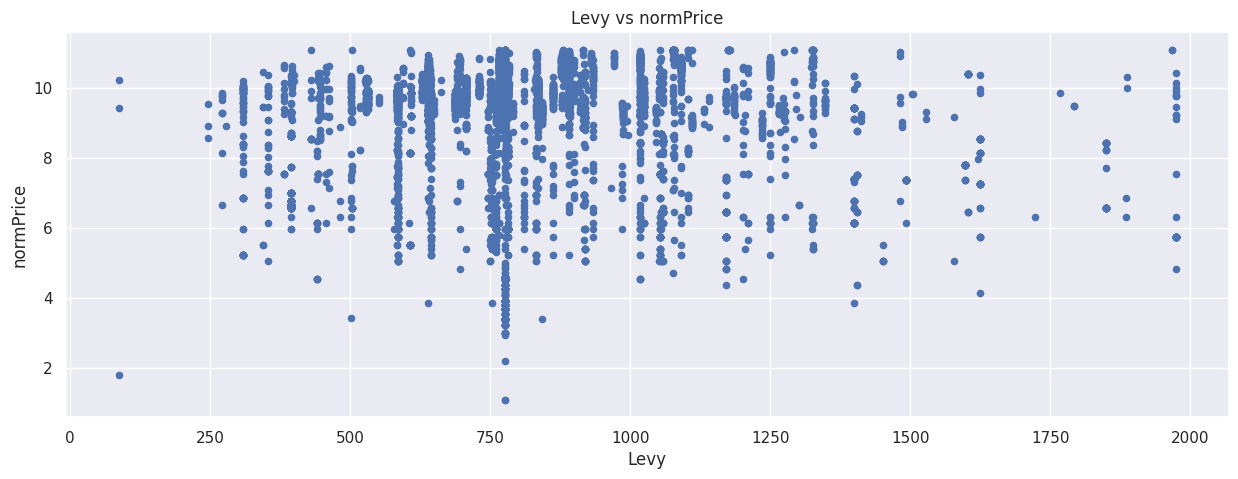

In [38]:
for col in ['Engine volume', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags', 'Levy']:
    CarData.plot(kind='scatter', x=col, y='normPrice', title=col+' vs normPrice', figsize=(15,5))

Observations.
* Engine volume - potential positive trend, needs further analysis
* Prod. year - potential positive trend, needs further analysis
* Mileage - potential negative trend, needs further analysis
* Cylinders - unclear, needs further analysis
* Airbags - unclear, needs further analysis
* Levy - unclear, needs further analysis


Now we can further analyse the correlation using Pearson's coefficient method

In [39]:
continuous_columns = ['normPrice', 'Engine volume', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags','Levy']
CorrelationalData = CarData[continuous_columns].corr()
CorrelationalData

,normPrice,Engine volume,Prod. year,Mileage,Cylinders,Airbags,Levy
normPrice,1.000000,-0.110951,0.264556,-0.147181,-0.023906,-0.270183,-0.035434
Engine volume,-0.110951,1.000000,-0.020374,0.064009,0.916466,0.328975,0.542713
Prod. year,0.264556,-0.020374,1.000000,-0.140195,0.035794,0.003376,-0.027758
Mileage,-0.147181,0.064009,-0.140195,1.000000,0.110764,-0.003757,-0.019327
Cylinders,-0.023906,0.916466,0.035794,0.110764,1.000000,0.151313,0.536460
Airbags,-0.270183,0.328975,0.003376,-0.003757,0.151313,1.000000,0.092484
Levy,-0.035434,0.542713,-0.027758,-0.019327,0.536460,0.092484,1.000000


**Pearson correlation values**
* Engine Volume vs Price = -0.11
* Prod. year vs Price = 0.26
* Mileage vs Price = -0.15
* Cylinders vs Price = -0.02
* Airbags vs Price = -0.27
* Levy vs Price = -0.03

None of the predictor to target variable relationships are extremly strong. Final selection of continuous data will filter absolute correlation of > 0.2 with target variable.

In [40]:
# Filtering only those columns where absolute correlation > 0.1 with Target Variable
CorrelationalData['normPrice'][abs(CorrelationalData['normPrice']) >= 0.1 ]

,normPrice
normPrice,1.000000
Engine volume,-0.110951
Prod. year,0.264556
Mileage,-0.147181
Airbags,-0.270183


Final selected continuous attributes are:
* Engine volume
* Prod. year
* Mileage
* Airbags


**Categorical Correlation Analysis**

Now we can analyse the relationship between the categorical data and the target variable normPrice, using box plots.

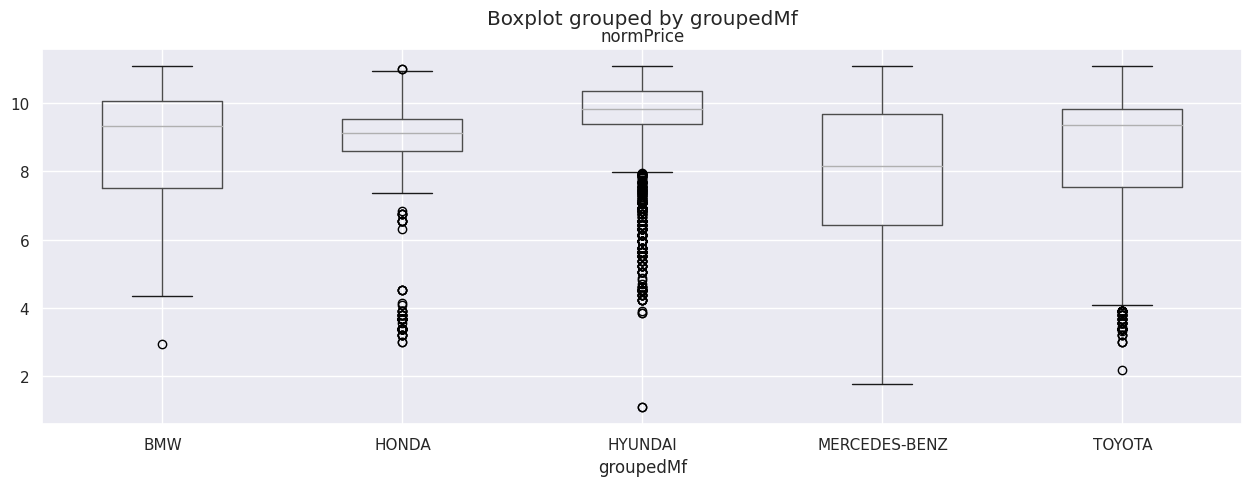

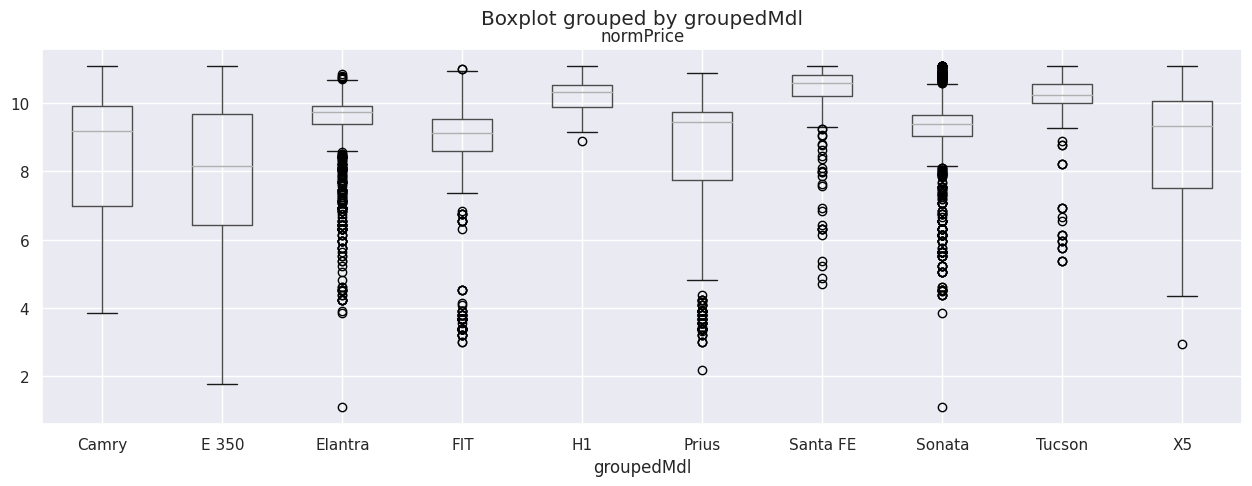

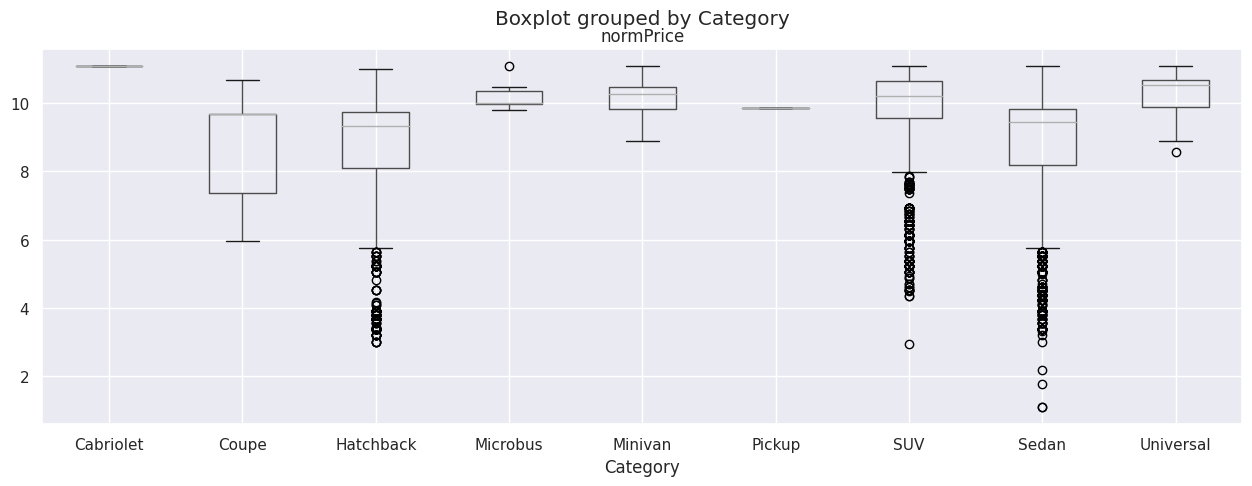

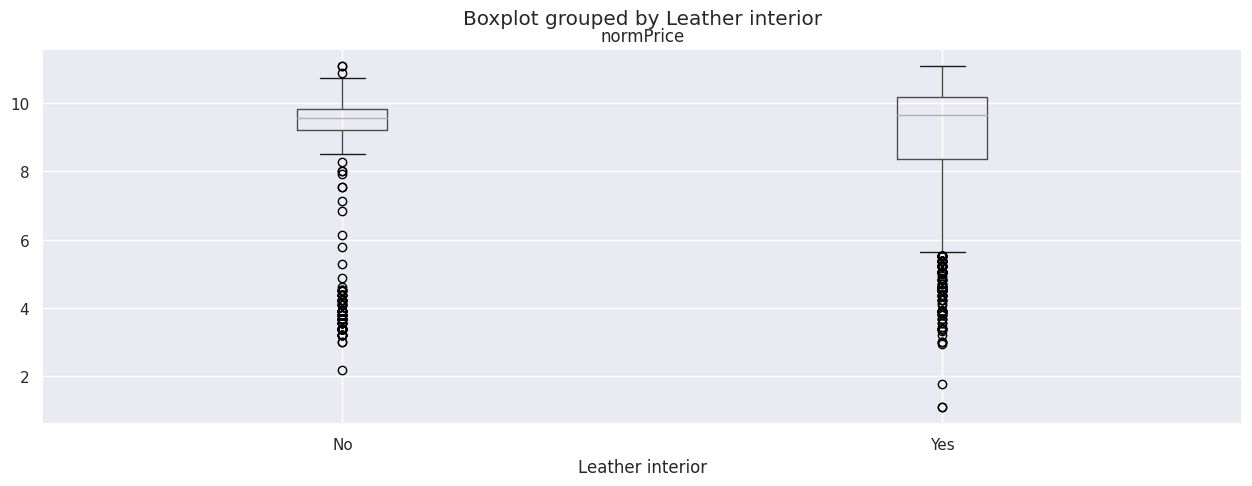

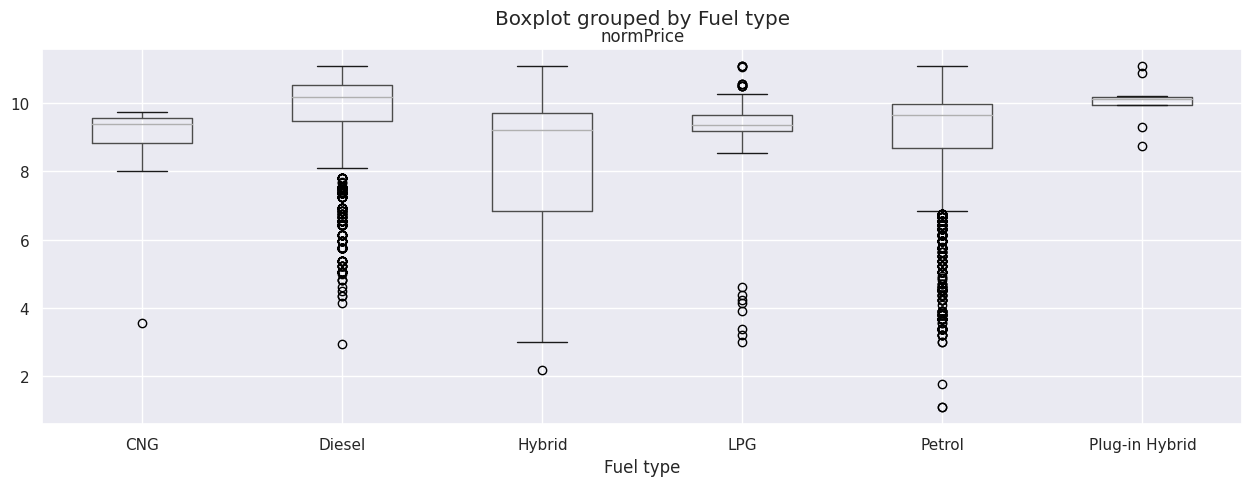

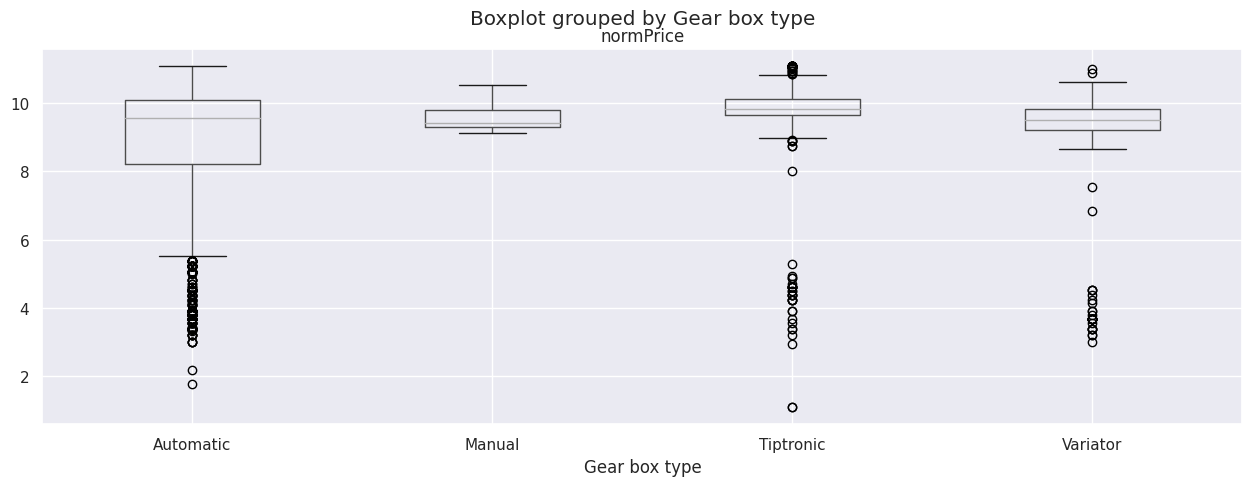

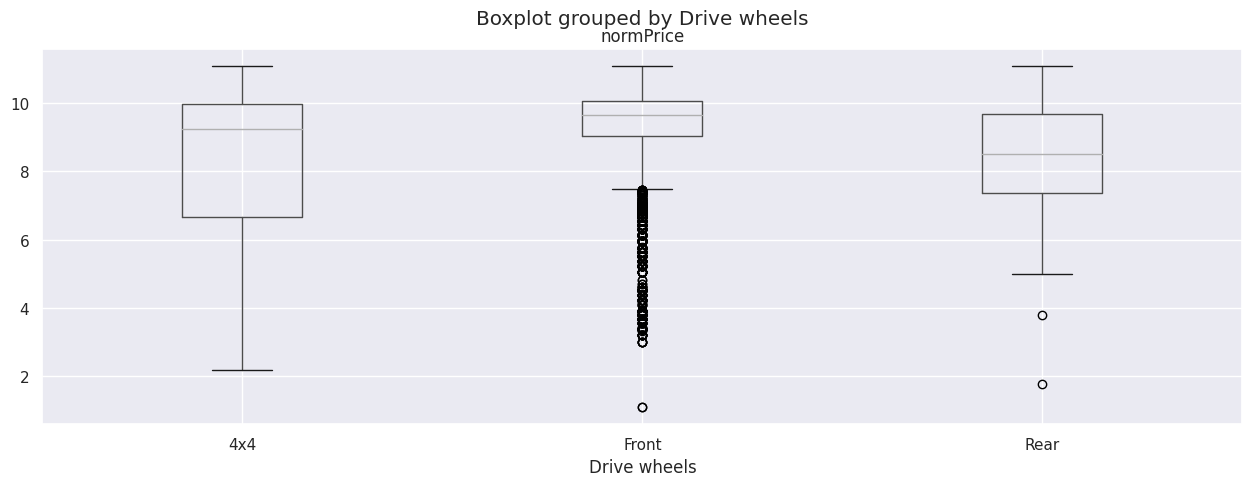

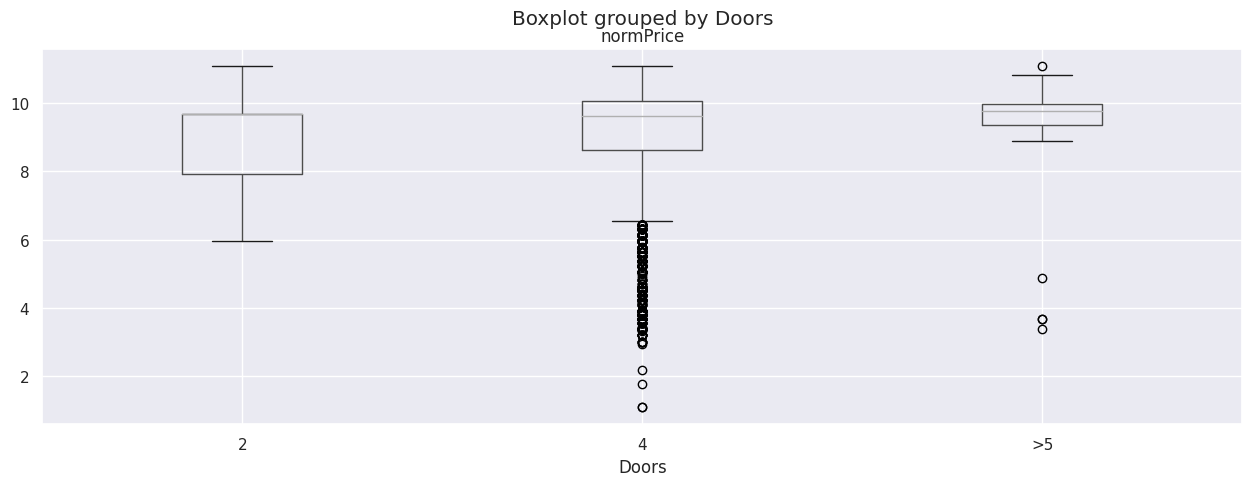

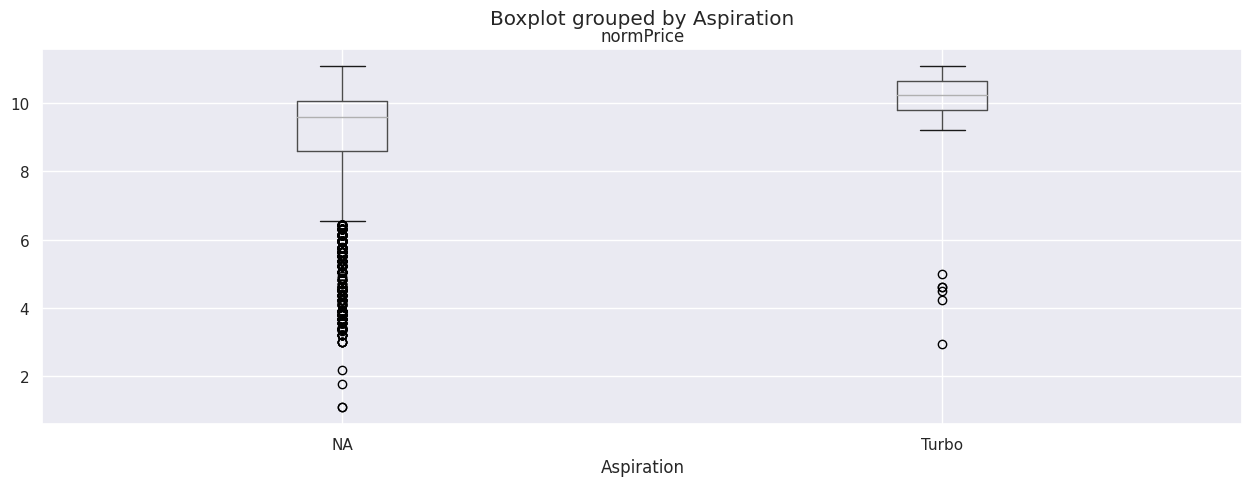

In [41]:
# Box plots for continuous Target Variable "normPrice" vs Categorical predictors
CategoricalColsList=['groupedMf', 'groupedMdl', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Aspiration']

# Creating box plots for each continuous predictor against the Target Variable "normPrice"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CarData.boxplot(column='normPrice', by=PredictorCol, figsize=(15,5), vert=True)


Most boxplots display similar distributions for each category, these variables will likely have little effect on the efficacy of the prediction model.

# Task 9: ANOVA analysis

In order to further investigate the correlation of the categorical columns and the target normPrice we will analyse the relationship using ANOVA test.


In [42]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [43]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Aspiration', ]
FunctionAnova(inpData=CarData,
              TargetVariable='normPrice',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Manufacturer is correlated with normPrice | P-Value: 1.922418215907237e-195
Model is correlated with normPrice | P-Value: 2.316234831477561e-275
Category is correlated with normPrice | P-Value: 1.739955662531545e-137
Leather interior is correlated with normPrice | P-Value: 0.008108273296091626
Fuel type is correlated with normPrice | P-Value: 3.678421011176384e-128
Gear box type is correlated with normPrice | P-Value: 5.7939556453837885e-27
Drive wheels is correlated with normPrice | P-Value: 6.306231111703332e-35
Doors is NOT correlated with normPrice | P-Value: 0.8009535702148074
Aspiration is correlated with normPrice | P-Value: 2.45609476828995e-11


['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Aspiration']

Observations:

ANOVA test showed all categorical columns except ‘Doors’ are correlated with the target, however selecting all columns as final predictors would heavily bloat the predictor list as they need to be transformed into numerical columns to be used by the model.

This, combined with the insight gained from the box plots means we will not select any categorical data as final predictors unless prediction is shown to be inaccurate. In which case we will add categorical data as predictors in order of their correlation shown by the P-value in ANOVA testing, until an acceptable accuracy is attained.


# Task 10: Selecting Final Predictors

Based on the EDA we determine the final attributes to be:
* Engine volume
* Prod. year
* Mileage
* Airbags



In [44]:
SelectedColumns = ['Engine volume', 'Prod. year', 'Mileage', 'Airbags']
DataForML = CarData[SelectedColumns]
DataForML.head()

,Engine volume,Prod. year,Mileage,Airbags
2,1.3,2006,200000,2
4,1.3,2014,91901,4
5,2.0,2016,160931,4
6,1.8,2010,258909,12
7,2.4,2013,216118,12


In [45]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Task 11: Data Pre-processing

All predictors are continuous and so no need to convert to numeric.

We can now add the target variable to the data to be used in the prediction models.

In [46]:
# Adding Target Variable to the data
DataForML['normPrice'] = CarData['normPrice']

# Printing sample rows
DataForML.head()

,Engine volume,Prod. year,Mileage,Airbags,normPrice
2,1.3,2006,200000,2,9.043932
4,1.3,2014,91901,4,9.369564
5,2.0,2016,160931,4,10.583879
6,1.8,2010,258909,12,7.497207
7,2.4,2013,216118,12,6.308098


# Task 12: Train/test data split and standardisation/normalisation of data

In [47]:
DataForML.columns

Index(['Engine volume', 'Prod. year', 'Mileage', 'Airbags', 'normPrice'], dtype='object')

Instead of using all data we will take a portion for training and a smaller portion for testing the prediction against the actual normPrice.

Splitting training/testing data and Standardization/Normalization

In [48]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Separate Target Variable and Predictor Variables
TargetVariable='normPrice'

#Predictors=['Prod. year', 'Cylinders','Engine volume', 'Mileage', 'Airbags']
PredictorsWithAll= ['Prod. year','Engine volume','Mileage', 'Airbags']

X=DataForML[PredictorsWithAll].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# On this data Min Max Normalization produced better results
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

In [49]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4684, 4)
(4684,)
(2008, 4)
(2008,)


# Task 13: Investigating multiple regression algorithms

Now that we have our data prepared for using in a prediction model we will test five different models and compare the final accuracy of each.

First we will test Multiple Linear Regression


In [50]:
#Multiple Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsWithAll)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['normPrice']-TestingDataResults['PredictednormPrice']))/TestingDataResults['normPrice'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.1587954373184658

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Engine volume   Mileage  Airbags  normPrice  PredictednormPrice
0      2018.0            2.0   16922.0      4.0  10.634725                10.0
1      2014.0            1.8  107155.0     12.0   7.452982                 9.0
2      2010.0            3.5  229904.0     12.0   6.152733                 8.0
3      2007.0            1.6  122587.0      4.0   9.338558                 9.0
4      2013.0            2.5  232032.0     12.0   5.971262                 8.0
Mean Accuracy on test data: 82.47862957424458
Median Accuracy on test data: 91.626771527795

Accuracy values for 10-fold Cross Validation:
 [82.32868803 83.66275718 84.14152061 82.55035132 85.29037721 84.39118556
 83.51147439 83.6751917  82.31488205 84.09623228]

Final Average Accuracy of the model: 83.6


Results:
Final accuracy of 83.6, prediction is reasonably accurate.


Test 2. Decision Trees

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.44685049205223926

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Engine volume   Mileage  Airbags  normPrice  PredictednormPrice
0      2018.0            2.0   16922.0      4.0  10.634725                11.0
1      2014.0            1.8  107155.0     12.0   7.452982                 8.0
2      2010.0            3.5  229904.0     12.0   6.152733                 7.0
3      2007.0            1.6  122587.0      4.0   9.338558                10.0
4      2013.0            2.5  232032.0     12.0   5.971262                 7.0
Mean Accuracy on test data: 85.92630977394803
Median Accuracy on test data: 93.6655180274241

Accuracy values for 10-fold Cross Validation:
 [85.64600866 87.26980981 87.94171615 86.91227872 88.07304383 88.19519503
 87.36495034 87.88743125 86.58550392 87.33149295]

Final Average Accuracy of the model: 87.32


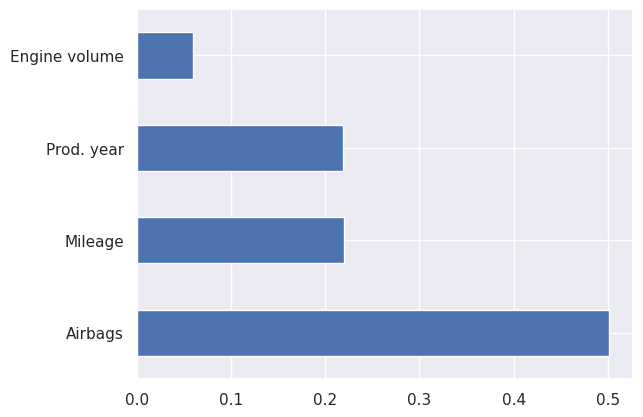

In [51]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=PredictorsWithAll)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsWithAll)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['normPrice']-TestingDataResults['PredictednormPrice']))/TestingDataResults['normPrice'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Results:

Final accuracy 87.32, acceptable accuracy.

‘Airbags’ is the most valuable predictor for the Decision Trees model.


Test 3. Random Forest

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.4225458419278777

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Engine volume   Mileage  Airbags  normPrice  PredictednormPrice
0      2018.0            2.0   16922.0      4.0  10.634725                10.0
1      2014.0            1.8  107155.0     12.0   7.452982                 8.0
2      2010.0            3.5  229904.0     12.0   6.152733                 7.0
3      2007.0            1.6  122587.0      4.0   9.338558                 9.0
4      2013.0            2.5  232032.0     12.0   5.971262                 7.0
Mean Accuracy on test data: 85.97061550671691
Median Accuracy on test data: 93.15217806817168

Accuracy values for 10-fold Cross Validation:
 [85.37309402 86.79000989 87.6672411  86.32065847 87.85690763 87.68196928
 86.96747011 87.11773308 86.07141836 86.84579352]

Final Average Accuracy of the model: 86.87


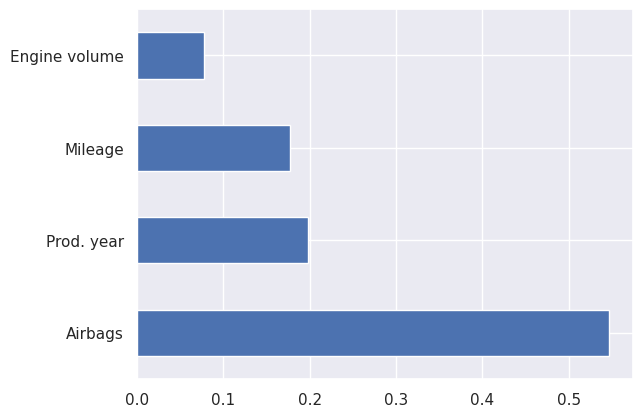

In [52]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=PredictorsWithAll)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsWithAll)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['normPrice']-TestingDataResults['PredictednormPrice']))/TestingDataResults['normPrice'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Results:

Final accuracy 86.82, acceptable accuracy.

‘Airbags’ is the most valuable predictor for the Decision Trees model.

Prod. year decreased in efficacy as a predictor compared to Decision trees model


Test 4. Xtreme Gradient Boosting

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.5474787088453075

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Engine volume   Mileage  Airbags  normPrice  PredictednormPrice
0      2018.0            2.0   16922.0      4.0  10.634725                11.0


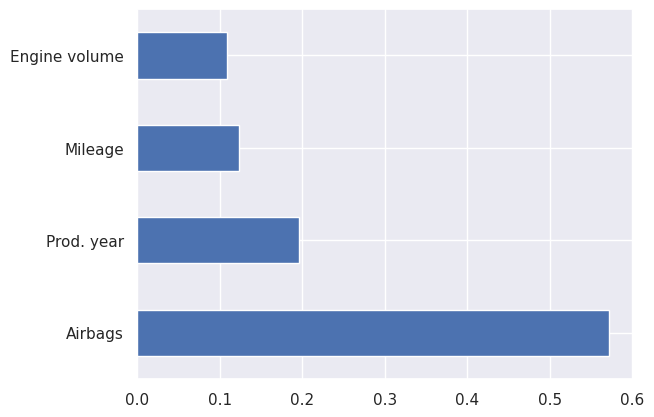

In [53]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=PredictorsWithAll)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsWithAll)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['normPrice']-TestingDataResults['PredictednormPrice']))/TestingDataResults['normPrice'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Results:

Final accuracy 88.53, acceptable accuracy.

‘Airbags’ again the most significant predictor for the model.

In [54]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsWithAll)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['normPrice']-TestingDataResults['PredictednormPrice']))/TestingDataResults['normPrice'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.6245360727122009

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Engine volume   Mileage  Airbags  normPrice  PredictednormPrice
0      2018.0            2.0   16922.0      4.0  10.634725                10.0
1      2014.0            1.8  107155.0     12.0   7.452982                 8.0
2      2010.0            3.5  229904.0     12.0   6.152733                 6.0
3      2007.0            1.6  122587.0      4.0   9.338558                10.0
4      2013.0            2.5  232032.0     12.0   5.971262                 6.0
Mean Accuracy on test data: 86.74459162065136
Median Accuracy on test data: 93.99537737799294

Accuracy values for 10-fold Cross Validation:
 [89.89669966 90.66639856 90.419572   90.55700477 91.51136348 90.77552894
 90.58012919 91.70149252 90.43223746 90.11156763]

Final Average Accuracy of the model: 90.67


Results:

Final accuracy of 90.67, acceptable accuracy.

Highest accuracy of 5 tested models.


Observations from task 13.

Final Accuracies:

* Multiple Linear Regression - 83.6
* Decision Trees - 87.32
* Random Forest - 86.82
* Xtreme Gradient Boosting - 88.53
* KNN - 90.67

KNN yielded the highest accuracy.

Accuracies are high enough that categorical data will not need to be converted to numerical and inserted in the final predictors list.

'Airbags' was repeatedly the most significant predictor for the target. This is unexpected both because of the Pearson correlation value relative to other predictors and the perceived unimportance one would assume.

# Task 14: Selection of the best model

**Final Average Accuracy of 90.67 is extremely effective for a prediction model**

KNN yielded the highest accuracy and so will be selected as the final model.

All predictors are valuable to the final accuracy for KNN and so will be included in the implementation.

# Task 15: Deployment of the best model in production


In [56]:
# Separate Target Variable and Predictor Variables
TargetVariable='normPrice'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Prod. year','Engine volume','Mileage', 'Airbags']
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(6692, 4)
(6692,)


**Cross Validation**

In [57]:

from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [89.89669966 90.66639856 90.419572   90.55700477 91.51136348 90.77552894
 90.58012919 91.70149252 90.43223746 90.11156763]

Final Average Accuracy of the model: 90.67


**Training the model on 100% Data**


In [58]:
Final_KNN_Model=RegModel.fit(X,y)

**Save as serialized file**

In [61]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_KNN_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_KNN_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


**Python function**

In [66]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Prod. year','Engine volume','Mileage', 'Airbags']


    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_KNN_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

**Testing Function**

In [63]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[2006,1.3,200000,2], [2014,1.3,97777,4]],columns=['Prod. year','Engine volume','Mileage', 'Airbags'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Prod. year  Engine volume  Mileage  Airbags
0        2006            1.3   200000        2
1        2014            1.3    97777        4


,Prediction
0,9.077447
1,9.270903


In [64]:
CarData.head(2)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Airbags,Aspiration,normPrice,groupedMf,groupedMdl
2,8467,777.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,1,Variator,Front,4,2,NA,9.043932,HONDA,FIT
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,1,Automatic,Front,4,4,NA,9.369564,HONDA,FIT


Observations of function:

Prediction: 9.077447

NormPrice: 9.043932

Prediction (inverse log e^x, where x = 9.077447) = $8,755.58 USD

Actual Price: $8,467 USD

Function is working as expected with acceptable accuracy.

Graphical User Interface:

Will need to run in PyCharm with 'Final_KNN_Model.pkl' and 'scaker.pkl' in the same folder.

In [65]:
import tkinter as tk
from tkinter import messagebox
import joblib
import math

# Load the model and scaler
model = joblib.load('Final_KNN_Model.pkl')
scaler = joblib.load('scaler.pkl')

# Function to make predictions
def predict_price(prod_year, engine_volume, mileage, airbags):
    try:
        # Convert the inputs to floats and reshape them for the scaler
        inputs = [[
            float(prod_year),
            float(engine_volume),
            float(mileage),
            int(airbags)
        ]]
        inputs_scaled = scaler.transform(inputs)

        # Make a prediction using the scaled inputs
        predicted_price = model.predict(inputs_scaled)[0]
        return predicted_price
    except ValueError as ve:
        return f"Input Error: {ve}"
    except Exception as e:
        return f"Error: {e}"

# Tkinter application for user input and prediction
class CarPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Car Price Prediction')

        # Labels and input fields
        self.prod_year_label = tk.Label(master, text='Prod. Year:')
        self.prod_year_label.grid(row=0, column=0)
        self.prod_year_entry = tk.Entry(master)
        self.prod_year_entry.grid(row=0, column=1)

        self.engine_volume_label = tk.Label(master, text='Engine Volume:')
        self.engine_volume_label.grid(row=1, column=0)
        self.engine_volume_entry = tk.Entry(master)
        self.engine_volume_entry.grid(row=1, column=1)

        self.mileage_label = tk.Label(master, text='Mileage:')
        self.mileage_label.grid(row=2, column=0)
        self.mileage_entry = tk.Entry(master)
        self.mileage_entry.grid(row=2, column=1)

        self.airbags_label = tk.Label(master, text='Airbags:')
        self.airbags_label.grid(row=3, column=0)
        self.airbags_entry = tk.Entry(master)
        self.airbags_entry.grid(row=3, column=1)

        # Predict button
        self.predict_button = tk.Button(master, text='Predict Price', command=self.get_prediction)
        self.predict_button.grid(row=4, column=0, columnspan=2)

    def get_prediction(self):
        # Get the input values
        prod_year = self.prod_year_entry.get()
        engine_volume = self.engine_volume_entry.get()
        mileage = self.mileage_entry.get()
        airbags = self.airbags_entry.get()

        # Call the prediction function
        predicted_price = predict_price(prod_year, engine_volume, mileage, airbags)

        dollar_predicted_price = math.exp(predicted_price)

        # Check if the result is a number or an error message
        try:
            # Try to format the result as a float
            formatted_price = float(dollar_predicted_price)
            messagebox.showinfo('Predicted Price', f'The predicted car price is: ${formatted_price:.2f}')
        except ValueError:
            # If there's an error, show it directly
            messagebox.showerror('Error', f'An error occurred: {predicted_price}')

# Main loop
if __name__ == '__main__':
    root = tk.Tk()
    app = CarPricePredictionApp(root)
    root.mainloop()

['scaler.pkl']